### Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime


### Import the csv file


In [2]:
Info = pd.read_csv('C:\DataScience_Interview\Expedia_Flight_Delay_Prediction\Microsoft Stock\Microsoft_Stock.csv')

Info.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


Data wrangling

In [3]:
# Extract Dates, Time, year, and month and add them to the data frame as separate columns

Info['Dates'] = pd.to_datetime(Info['Date']).dt.date
Info['Time'] = pd.to_datetime(Info['Date']).dt.time
Info['year'] = pd.to_datetime(Info['Dates']).dt.year
Info['month'] = pd.to_datetime(Info['Dates']).dt.month

# Remove the Time column for repetition
Info = Info.drop('Time', axis=1)

# Remove the Date column to avoid repetition
Info = Info.drop('Date', axis=1)

Info.head()

,Open,High,Low,Close,Volume,Dates,year,month
0,40.60,40.76,40.31,40.72,36865322,2015-04-01,2015,4
1,40.66,40.74,40.12,40.29,37487476,2015-04-02,2015,4
2,40.34,41.78,40.18,41.55,39223692,2015-04-06,2015,4
3,41.61,41.91,41.31,41.53,28809375,2015-04-07,2015,4
4,41.48,41.69,41.04,41.42,24753438,2015-04-08,2015,4


In [4]:
# Create a separate data frame including only "Dates","year", "month", and "Close" columns.
Info_close = pd.DataFrame(columns=["Dates","year", "month", "Close"])
Info_close["Dates"] = Info["Dates"]
Info_close["year"] = Info["year"]
Info_close["month"] = Info["month"]
Info_close["Close"] = Info["Close"]

Info_close.head()


,Dates,year,month,Close
0,2015-04-01,2015,4,40.72
1,2015-04-02,2015,4,40.29
2,2015-04-06,2015,4,41.55
3,2015-04-07,2015,4,41.53
4,2015-04-08,2015,4,41.42


In [5]:
# Convert Dates into date time format
Info_close["Dates"] = pd.to_datetime(Info_close["Dates"])
Info_close = Info_close.set_index("Dates")

#### Specify Train and Test Data

In [6]:
# Split the train and test data by the ratio of 85% to 15%
train_data, test_data = Info_close[0:int(len(Info_close)*0.85)], Info_close[int(len(Info_close)*0.85):]
train_data.head()

,year,month,Close
Dates,,,
2015-04-01,2015,4,40.72
2015-04-02,2015,4,40.29
2015-04-06,2015,4,41.55
2015-04-07,2015,4,41.53
2015-04-08,2015,4,41.42


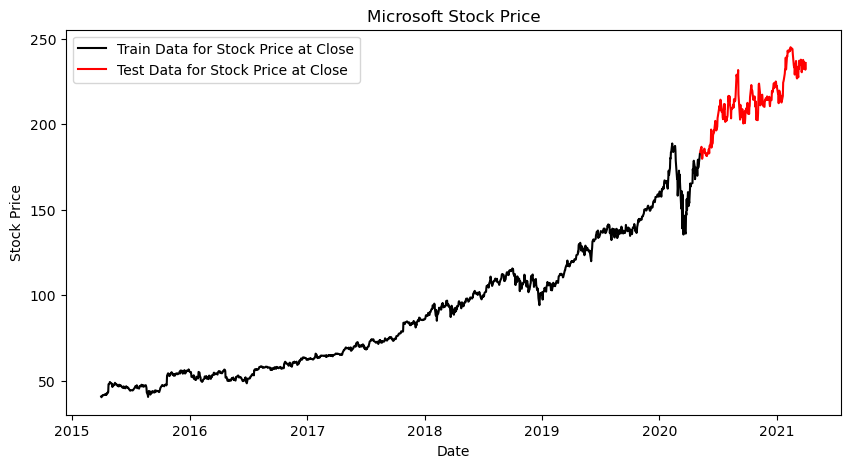

In [7]:
plt.figure(figsize=(10,5))
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.plot(train_data['Close'], 'black', label='Train Data for Stock Price at Close')
plt.plot(test_data['Close'], 'red', label='Test Data for Stock Price at Close')
plt.legend()

#### Train an ARIMA model 

In [8]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model =  sm.tsa.arima.ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)

# pring the mean squared error of the predictions using ARIMA model
print('Testing Mean Squared Error: %.3f' % error)

<class 'list'>
Testing Mean Squared Error: 14.557


#### The accuracy of the model is about 85%. 

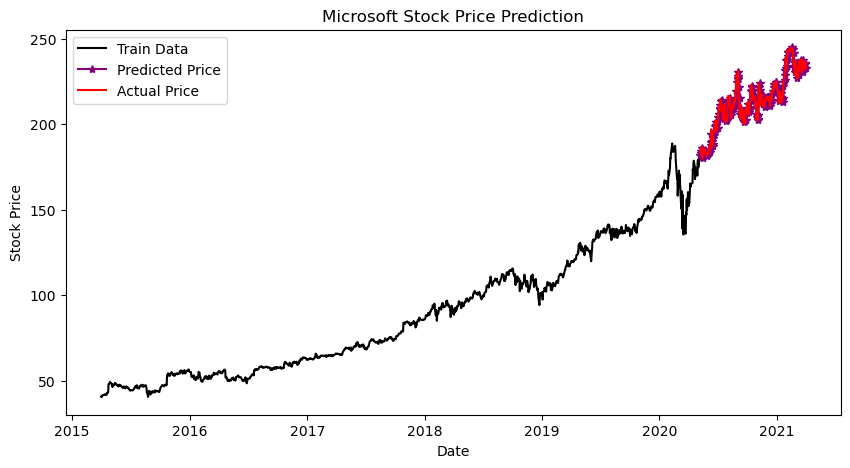

In [9]:
plt.figure(figsize=(10,5))
plt.plot(Info_close['Close'], 'green', color='black', label='Train Data')
plt.plot(test_data.index, predictions, color='purple', marker='*',  
         label='Predicted Price')
plt.plot(test_data.index, test_data["Close"], color='red', label='Actual Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()